<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->

---


    
Reza| Amini| 672783344|ramini3@uic.edu|





<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 1.**
Load kddb-raw-libsvm) train and test sets using the code provided below (expect data loading to take several minutes).

### **Answer.**

Here we ran the linear regression algorithm to optimize the given mean square error. The results will then be compared with ones from gradient descent and stochastic gradient descent.\
\
**Note:** The parts of the code that were identical with what has been discussed in the class were copied directly. 

In [2]:
"""
    =====================
    Code for Loading Data
    =====================
"""
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import numpy as np


def data_loader():    
    X_train, y_train    = load_svmlight_file('kddb-raw-libsvm.train.bz2',   n_features=1163024)
    X_test, y_test      = load_svmlight_file('kddb-raw-libsvm.test.bz2',    n_features=1163024)

    # Normalize the data using StandardScaler, which scales the data to unit norm.
    # This line computes the normalization coefficient
    scaler = Normalizer().fit(X_train)

    # Use the tranform function to normalize the training and test feature data
    # Since we calling it from the scaler instance we created, it knows the correct
    # scaling for normalization
    X_train             = scaler.transform(X_train)
    X_test              = scaler.transform(X_test)

    return  X_train, X_test, y_train, y_test

if __name__== "__main__":
    X_train, X_test, y_train, y_test    = data_loader()

<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 2.**
Print out the numbers of training and test observations and plot histograms of the training and test target variables y_test and y_train, respectively. What percentages of the training and test sets belong to class 1? Use the Python code discussed in the class and depict the scatter plot of the sparse matrix X_train.



### **Answer.**

------------------------
Number of rows:  19264097 , Number of columns:  1163024
------------------------


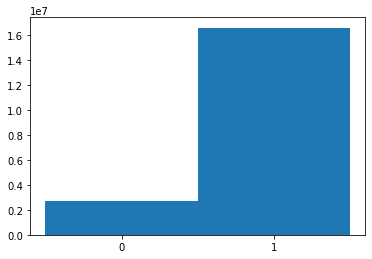

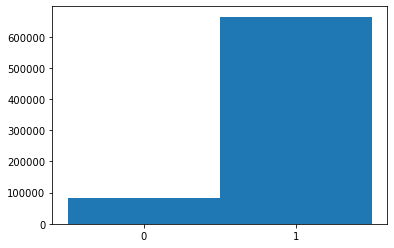

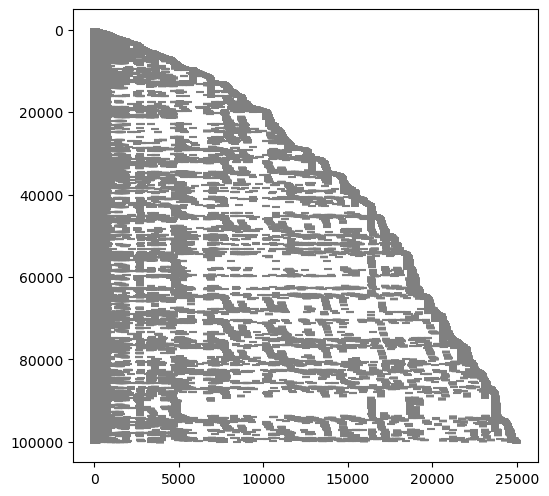

In [18]:
nRows, nCols = X_train.shape

print('------------------------')
print('Number of rows: ', nRows, ', Number of columns: ', nCols)
print('------------------------')

plt.hist(y_train, 2)
plt.xticks([0.25,0.75], ["0", "1"])
plt.show()
plt.hist(y_test, 2)
plt.xticks([0.25,0.75], ["0", "1"])
plt.show()
StartRow = 0
numRows = 100000

# Compute the indices of the starting and ending non-zero data points
EndRow = StartRow + numRows
numPointsStart = X_train.indptr[StartRow]
numPointsEnd = X_train.indptr[StartRow + numRows]

# Compute number of data points
numPoints = numPointsEnd - numPointsStart

# Store column indices as x values for scatter plot
xVals = X_train.indices[numPointsStart:numPointsEnd]+1

# Code to assign row indices as y values for scatter plot
yVals = np.empty(numPoints, dtype= np.int32) 
for rowInd in range(StartRow,EndRow):
    dataStart = X_train.indptr[rowInd]
    dataEnd = X_train.indptr[rowInd + 1]
    for colInd in range(dataStart,dataEnd):
        yVals[colInd - X_train.indptr[StartRow]] = rowInd

# Generate scatter plot
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(xVals, yVals, marker = '_',color='gray')
ax = plt.gca()
# Invert y-axis so that smallest row index appears on top
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 3.1**
With the above parameters, write down the mathematical expression of the objective function and the optimization problem that model_1 corresponds to. Is the objective function differentiable? Is it convex? Is it strongly convex? Please explain.

### **Answer.**

Hinge loss with regularization is defined as follows. Since the regularization parameter is defined to be zero, the term is ignored.

$$f := \sum_{i = 1}^{n} max(0, 1 - yw^{T}x) + \frac{\lambda}{2}||w||^{2} = \sum_{i = 1}^{n} max(0, 1 - yw^{T}x)$$

The loss function is the maximum between a constant (0) and a linear term (which is convex), therefore, the loss function itself is convex. In this regard, hinge loss is not strongly convex unless it is accomponied by a strongly convex regularization term.<sup>1</sup>

<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 3.2**

Review the Python code for the regression application that is taught in the class. Write a similar code for fitting model_1 on the training set (X_train, y_train) via stochastic gradient descent (SGD). How many SGD epochs are needed to converge (use attribute n_iter_ of SGDClassifier to see the number of epochs)? What is the total runtime of SGD in seconds? What are the training and test scores (accuracies) of model_1 fitted by SGD? Report your answers in the following table:
### **Answer.**


In [28]:
"""
____________________________
Code for Question 2. Part 3.2
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import time


model_1             = SGDClassifier(
                                    loss          = 'hinge',
                                    penalty       = 'l2',
                                    alpha         = 0.0,
                                    l1_ratio      = 0.0,
                                    fit_intercept = False,
                                    learning_rate = 'constant',
                                    eta0          = 1,
                                    random_state  = 321,
                                    verbose         = True)

print("Maximum number of epochs = ", model_1.max_iter)
print("------------------------")
start = time.time()

model_1.fit(X_train, y_train)

end = time.time()

duration = end - start
print("Total runtime = ", duration)
print("------------------------")

training_score = model_1.score(X_train, y_train)

print("Training score = ", training_score) 
print("------------------------")

test_score = model_1.score(X_test, y_test)

print("Test score = ", test_score) 
print("------------------------")

Maximum number of epochs =  1000
------------------------
-- Epoch 1
Norm: 426.66, NNZs: 554969, Bias: 0.000000, T: 19264097, Avg. loss: 0.383528
Total training time: 5.17 seconds.
-- Epoch 2
Norm: 616.94, NNZs: 684704, Bias: 0.000000, T: 38528194, Avg. loss: 0.380198
Total training time: 10.21 seconds.
-- Epoch 3
Norm: 799.06, NNZs: 757507, Bias: 0.000000, T: 57792291, Avg. loss: 0.377629
Total training time: 15.29 seconds.
-- Epoch 4
Norm: 973.75, NNZs: 805999, Bias: 0.000000, T: 77056388, Avg. loss: 0.375243
Total training time: 20.73 seconds.
-- Epoch 5
Norm: 1140.68, NNZs: 841329, Bias: 0.000000, T: 96320485, Avg. loss: 0.373171
Total training time: 26.36 seconds.
-- Epoch 6
Norm: 1301.95, NNZs: 868303, Bias: 0.000000, T: 115584582, Avg. loss: 0.371298
Total training time: 31.80 seconds.
-- Epoch 7
Norm: 1457.70, NNZs: 890235, Bias: 0.000000, T: 134848679, Avg. loss: 0.369517
Total training time: 37.29 seconds.
-- Epoch 8
Norm: 1606.96, NNZs: 908120, Bias: 0.000000, T: 154112776, 

In [44]:
print('{:>20}{:>20}{:>20}{:>20}{:>30}'.format("Number of epochs (K)", "Training Accuracy", "Test Accuracy", "Runtime", "Ave. Per Epoch Runtime"))
print('{:>20}{:>20}{:>20}{:>20}{:>30}'.format(18, training_score, testing_score, duration, duration/18))

Number of epochs (K)   Training Accuracy       Test Accuracy             Runtime        Ave. Per Epoch Runtime
                  18  0.8685922314448479  0.8741075973976518   99.69448709487915             5.538582616382175


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 3.3**
How does the total runtime of GD compare with SGD? How does the average of GD runtime across the epochs compare to the average SGD runtime per epoch? How does the terminal training and test accuracies of model_1 fitted by GD and SGD compare?

### **Answer.**

#### Runtime and average runtime of each epoch of SGD is better than GD, while both provide similar accuracies after 18 iterations. The SGD's training and test error are 0.861 and 0.867, and the GD's are 0.868 and 0.874. which seems equal.

In [34]:
"""
____________________________
Code for Question 2. Part 3.3
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import time


model_1             = SGDClassifier(
                                    loss          = 'hinge',
                                    penalty       = 'l2',
                                    alpha         = 0.0,
                                    l1_ratio      = 0.0,
                                    fit_intercept = False,
                                    learning_rate = 'constant',
                                    eta0          = 1,
                                    random_state  = 321)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train score','Test score','Tot runtime'))

start = time.time()

per_iter_runtime_list = []
runtime_list_1 = []
train_score_list_1 = []
test_score_list_1 = []
classes = np.unique(y_train)

for _ in range(18):

    per_iter_start   = time.time()
    

    model_1.partial_fit(X_train, y_train, classes)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    if _%1==0:
        
        training_score       = model_1.score(X_train, y_train)    
        testing_score        = model_1.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.1f}'.format(_,training_score,testing_score,time.time()-start))
        runtime_list_1.append(time.time()-start)
        train_score_list_1.append(training_score)
        test_score_list_1.append(testing_score)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration    Train score     Test score    Tot runtime
              0         0.8574         0.8707            9.4
              1         0.8603         0.8737           18.4
              2         0.8631         0.8766           27.4
              3         0.8627         0.8735           36.3
              4         0.8647         0.8773           45.3
              5         0.8650         0.8754           54.2
              6         0.8631         0.8712           63.2
              7         0.8649         0.8726           72.1
              8         0.8624         0.8670           81.0
              9         0.8649         0.8710           90.1
             10         0.8638         0.8696           99.1
             11         0.8656         0.8699          108.0
             12         0.8660         0.8709          117.0
             13         0.8646         0.8704          126.0
             14         0.8704         0.8776          134.9
      

<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 3.4**
How does the train and the test accuracies of the SGD changes with tol? From the table above, can you argue that SGD quickly gets close to a neighbor of the optimal solution?

### **Answer.**

#### By decreasing the tolerance value, the train data fits better but the test data fluctuates between high and low values which means that at some tolerances, the model overfits to train data.
#### Also, at the very early stages of simulation the loss function reaches to an acceptable distance of right solution, hence SGD quickly gets close to the answer.


In [45]:
"""
____________________________
Code for Question 2. Part 3.4
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import time

for tol0 in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
    print("------------------------")
    print("TOLERANCE = ", tol0)
    print("------------------------")
    model_1             = SGDClassifier(
                                        loss          = 'hinge',
                                        tol           = tol0,
                                        penalty       = 'l2',
                                        alpha         = 0.0,
                                        l1_ratio      = 0.0,
                                        fit_intercept = False,
                                        learning_rate = 'constant',
                                        eta0          = 1,
                                        random_state  = 321,
                                        verbose         = True)

    print("Maximum number of epochs = ", model_1.max_iter)
    print("------------------------")
    start = time.time()

    model_1.fit(X_train, y_train)

    end = time.time()

    duration = end - start
    print("Total runtime = ", duration)
    print("------------------------")

    training_score = model_1.score(X_train, y_train)

    print("Training score = ", training_score) 
    print("------------------------")

    test_score = model_1.score(X_test, y_test)

    print("Test score = ", test_score) 
    print("------------------------")

------------------------
TOLERANCE =  0.01
------------------------
Maximum number of epochs =  1000
------------------------
-- Epoch 1
Norm: 426.66, NNZs: 554969, Bias: 0.000000, T: 19264097, Avg. loss: 0.383528
Total training time: 5.08 seconds.
-- Epoch 2
Norm: 616.94, NNZs: 684704, Bias: 0.000000, T: 38528194, Avg. loss: 0.380198
Total training time: 9.88 seconds.
-- Epoch 3
Norm: 799.06, NNZs: 757507, Bias: 0.000000, T: 57792291, Avg. loss: 0.377629
Total training time: 14.42 seconds.
-- Epoch 4
Norm: 973.75, NNZs: 805999, Bias: 0.000000, T: 77056388, Avg. loss: 0.375243
Total training time: 18.96 seconds.
-- Epoch 5
Norm: 1140.68, NNZs: 841329, Bias: 0.000000, T: 96320485, Avg. loss: 0.373171
Total training time: 23.60 seconds.
-- Epoch 6
Norm: 1301.95, NNZs: 868303, Bias: 0.000000, T: 115584582, Avg. loss: 0.371298
Total training time: 28.23 seconds.
Convergence after 6 epochs took 28.23 seconds
Total runtime =  30.130627870559692
------------------------
Training score =  0.86

Norm: 3942.05, NNZs: 1033974, Bias: 0.000000, T: 693507492, Avg. loss: 0.352609
Total training time: 171.23 seconds.
-- Epoch 37
Norm: 3982.97, NNZs: 1034930, Bias: 0.000000, T: 712771589, Avg. loss: 0.352540
Total training time: 175.77 seconds.
-- Epoch 38
Norm: 4022.35, NNZs: 1035821, Bias: 0.000000, T: 732035686, Avg. loss: 0.352599
Total training time: 180.28 seconds.
-- Epoch 39
Norm: 4060.31, NNZs: 1036631, Bias: 0.000000, T: 751299783, Avg. loss: 0.352537
Total training time: 184.80 seconds.
-- Epoch 40
Norm: 4096.92, NNZs: 1037420, Bias: 0.000000, T: 770563880, Avg. loss: 0.352466
Total training time: 189.30 seconds.
-- Epoch 41
Norm: 4132.58, NNZs: 1038115, Bias: 0.000000, T: 789827977, Avg. loss: 0.352360
Total training time: 193.83 seconds.
-- Epoch 42
Norm: 4166.89, NNZs: 1038828, Bias: 0.000000, T: 809092074, Avg. loss: 0.352461
Total training time: 198.34 seconds.
-- Epoch 43
Norm: 4200.34, NNZs: 1039511, Bias: 0.000000, T: 828356171, Avg. loss: 0.352363
Total training ti

Norm: 4460.87, NNZs: 1044134, Bias: 0.000000, T: 1001733044, Avg. loss: 0.352117
Total training time: 247.39 seconds.
-- Epoch 53
Norm: 4486.21, NNZs: 1044537, Bias: 0.000000, T: 1020997141, Avg. loss: 0.352116
Total training time: 251.97 seconds.
-- Epoch 54
Norm: 4511.08, NNZs: 1044918, Bias: 0.000000, T: 1040261238, Avg. loss: 0.352101
Total training time: 256.74 seconds.
-- Epoch 55
Norm: 4535.21, NNZs: 1045352, Bias: 0.000000, T: 1059525335, Avg. loss: 0.352151
Total training time: 261.43 seconds.
-- Epoch 56
Norm: 4558.77, NNZs: 1045723, Bias: 0.000000, T: 1078789432, Avg. loss: 0.352069
Total training time: 266.25 seconds.
-- Epoch 57
Norm: 4582.01, NNZs: 1046095, Bias: 0.000000, T: 1098053529, Avg. loss: 0.352106
Total training time: 271.21 seconds.
-- Epoch 58
Norm: 4604.74, NNZs: 1046473, Bias: 0.000000, T: 1117317626, Avg. loss: 0.352134
Total training time: 275.89 seconds.
-- Epoch 59
Norm: 4626.95, NNZs: 1046826, Bias: 0.000000, T: 1136581723, Avg. loss: 0.352067
Total tra

Norm: 4486.21, NNZs: 1044537, Bias: 0.000000, T: 1020997141, Avg. loss: 0.352116
Total training time: 256.56 seconds.
-- Epoch 54
Norm: 4511.08, NNZs: 1044918, Bias: 0.000000, T: 1040261238, Avg. loss: 0.352101
Total training time: 261.53 seconds.
-- Epoch 55
Norm: 4535.21, NNZs: 1045352, Bias: 0.000000, T: 1059525335, Avg. loss: 0.352151
Total training time: 266.34 seconds.
-- Epoch 56
Norm: 4558.77, NNZs: 1045723, Bias: 0.000000, T: 1078789432, Avg. loss: 0.352069
Total training time: 271.03 seconds.
-- Epoch 57
Norm: 4582.01, NNZs: 1046095, Bias: 0.000000, T: 1098053529, Avg. loss: 0.352106
Total training time: 275.77 seconds.
-- Epoch 58
Norm: 4604.74, NNZs: 1046473, Bias: 0.000000, T: 1117317626, Avg. loss: 0.352134
Total training time: 280.37 seconds.
-- Epoch 59
Norm: 4626.95, NNZs: 1046826, Bias: 0.000000, T: 1136581723, Avg. loss: 0.352067
Total training time: 284.95 seconds.
-- Epoch 60
Norm: 4648.80, NNZs: 1047164, Bias: 0.000000, T: 1155845820, Avg. loss: 0.352091
Total tra

In [52]:
print('{:>10}{:>25}{:>20}{:>20}{:>20}{:>30}'.format("Tolerance", "Number of epochs (K)", "Training Accuracy", "Test Accuracy", "Runtime", "Ave. Per Epoch Runtime"))
print('{:>10}{:>25}{:>20}{:>20}{:>20}{:>30}'.format(1e-2, 6, 0.8615726966075804, 0.8716637203851946, 30.13, 30.13/6))
print('{:>10}{:>25}{:>20}{:>20}{:>20}{:>30}'.format(1e-3, 18,  0.8610217234682737, 0.8679798664085163, 84.97, 84.97/18))
print('{:>10}{:>25}{:>20}{:>20}{:>20}{:>30}'.format(1e-4, 46, 0.8689655684354164, 0.8707177034771466, 218.35, 218.35/46))
print('{:>10}{:>25}{:>20}{:>20}{:>20}{:>30}'.format(1e-5, 61, 0.87465843844121, 0.8793133627560626, 292.79, 292.79/61))
print('{:>10}{:>25}{:>20}{:>20}{:>20}{:>30}'.format(1e-6, 71, 0.8734654419566098, 0.8788817759463176, 343.90, 343.90/71))

 Tolerance     Number of epochs (K)   Training Accuracy       Test Accuracy             Runtime        Ave. Per Epoch Runtime
      0.01                        6  0.8615726966075804  0.8716637203851946               30.13            5.0216666666666665
     0.001                       18  0.8610217234682737  0.8679798664085163               84.97             4.720555555555555
    0.0001                       46  0.8689655684354164  0.8707177034771466              218.35             4.746739130434783
     1e-05                       61    0.87465843844121  0.8793133627560626              292.79              4.79983606557377
     1e-06                       71  0.8734654419566098  0.8788817759463176               343.9            4.8436619718309855


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 4.1**
Explain the differences between model_1 and model_2. With the above parameters, write down the mathematical expression of the objective function and the optimization problem that model_2 corresponds to. Is the the objective function convex? Is it strongly convex? Please explain.

### **Answer.**

Hinge loss with regularization is defined as follows. Here, we include the regularization term.

$$f := \sum_{i = 1}^{n} max(0, 1 - yw^{T}x) + \frac{\lambda}{2}||w||^{2}$$

The loss function is the maximum between a constant (0) and a linear term (which is convex), therefore, the loss function itself is convex. Is it is mentioned before, hinge loss is not strongly convex unless it is accomponied by a strongly convex regularization term. So by changing the $\lambda$, it is possible to make the loss function strongly convex.

<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 4.2**
How does the runtime of SGD (in seconds) vary between model_1 and model_2? Do you see that SGD becomes faster when fitting model_2 compared to model_1? Why? Do you see that model_2 has a higher test accuracy compared to model_1? Why?

### **Answer.**

#### The running time significantly decreased comparing to one without regularization. The test accuracy increased and train accuracy decreased, both by a small amount.
#### By adding the regularization term, the loss function becomes stronger in convexity, leading to larger steps to the solution and faster runtime.
#### Another fact is that regularization reduces overfitting. It means that train data may not fit well like before but the model is generalized better for new data (test data).

In [56]:
"""
____________________________
Code for Question 2. Part 4.2
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import time


model_2             = SGDClassifier(
                                    loss          = 'hinge',
                                    penalty       = 'l2',
                                    alpha         = 1.0e-4,
                                    l1_ratio      = 0.0,
                                    fit_intercept = False,
                                    learning_rate = 'constant',
                                    eta0          = 1.0,
                                    random_state  = 321,
                                    verbose       = True,
                                    tol           = 1e-3)

print("Maximum number of epochs = ", model_2.max_iter)
print("------------------------")
start = time.time()

model_2.fit(X_train, y_train)

end = time.time()

duration = end - start
print("Total runtime = ", duration)
print("------------------------")

training_score = model_2.score(X_train, y_train)

print("Training score = ", training_score) 
print("------------------------")

test_score = model_2.score(X_test, y_test)

print("Test score = ", test_score) 
print("------------------------")

Maximum number of epochs =  1000
------------------------
-- Epoch 1
Norm: 26.68, NNZs: 319287, Bias: 0.000000, T: 19264097, Avg. loss: 0.352230
Total training time: 5.48 seconds.
-- Epoch 2
Norm: 25.74, NNZs: 318611, Bias: 0.000000, T: 38528194, Avg. loss: 0.352234
Total training time: 11.22 seconds.
-- Epoch 3
Norm: 25.84, NNZs: 318459, Bias: 0.000000, T: 57792291, Avg. loss: 0.352284
Total training time: 16.57 seconds.
-- Epoch 4
Norm: 26.78, NNZs: 318242, Bias: 0.000000, T: 77056388, Avg. loss: 0.352239
Total training time: 22.10 seconds.
-- Epoch 5
Norm: 26.05, NNZs: 319162, Bias: 0.000000, T: 96320485, Avg. loss: 0.352239
Total training time: 27.53 seconds.
-- Epoch 6
Norm: 26.91, NNZs: 317896, Bias: 0.000000, T: 115584582, Avg. loss: 0.352268
Total training time: 32.85 seconds.
Convergence after 6 epochs took 32.85 seconds
Total runtime =  34.66947960853577
------------------------
Training score =  0.8527123280162054
------------------------
Test score =  0.8742532412436649
---

In [57]:
print('{:>20}{:>20}{:>20}{:>20}{:>30}'.format("Number of epochs (K)", "Training Accuracy", "Test Accuracy", "Runtime", "Ave. Per Epoch Runtime"))
print('{:>20}{:>20}{:>20}{:>20}{:>30}'.format(6, training_score, testing_score, duration, duration/6))

Number of epochs (K)   Training Accuracy       Test Accuracy             Runtime        Ave. Per Epoch Runtime
                   6  0.8527123280162054  0.8741075973976518   34.66947960853577            5.7782466014226275


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 4.3**
Do you see any significant change in the training and test accuracies of model_2 when you change the regularization term's weight (alpha) and the learning rate strategy? Compare the runtime of the models in the above table. Please justify your observations.

### **Answer.**
#### Optimal learning rate is significantly faster than adaptive, although the accuracies are similar. The accuracies and runtime within optimal cases does not differ much but within adaptive cases, high alpha leads to way slower simulation with quite identical accuracies.

In [58]:
"""
____________________________
Code for Question 2. Part 4.3
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import time

params = [(1e-4, 'optimal'),(1e-4, 'adaptive'),(1e-1, 'optimal'), (1e-1, 'adaptive')]
for param in params:
    print("------------------------")
    print("alpha = ", param[0], ", learning rate = ", param[1])
    print("------------------------")
    model_2             = SGDClassifier(
                                        loss          = 'hinge',
                                        penalty       = 'l2',
                                        alpha         = param[0],
                                        l1_ratio      = 0.0,
                                        fit_intercept = False,
                                        learning_rate = param[1],
                                        eta0          = 1.0,
                                        random_state  = 321,
                                        verbose       = True,
                                        tol           = 1e-5)

    print("Maximum number of epochs = ", model_2.max_iter)
    print("------------------------")
    start = time.time()

    model_2.fit(X_train, y_train)

    end = time.time()

    duration = end - start
    print("Total runtime = ", duration)
    print("------------------------")

    training_score = model_2.score(X_train, y_train)

    print("Training score = ", training_score) 
    print("------------------------")

    test_score = model_2.score(X_test, y_test)

    print("Test score = ", test_score) 
    print("------------------------")

------------------------
alpha =  0.0001 , learning rate =  optimal
------------------------
Maximum number of epochs =  1000
------------------------
-- Epoch 1
Norm: 5.71, NNZs: 653629, Bias: 0.000000, T: 19264097, Avg. loss: 0.279150
Total training time: 5.11 seconds.
-- Epoch 2
Norm: 5.71, NNZs: 743250, Bias: 0.000000, T: 38528194, Avg. loss: 0.278664
Total training time: 10.10 seconds.
-- Epoch 3
Norm: 5.71, NNZs: 791562, Bias: 0.000000, T: 57792291, Avg. loss: 0.278644
Total training time: 15.03 seconds.
-- Epoch 4
Norm: 5.71, NNZs: 822437, Bias: 0.000000, T: 77056388, Avg. loss: 0.278636
Total training time: 19.91 seconds.
-- Epoch 5
Norm: 5.71, NNZs: 844276, Bias: 0.000000, T: 96320485, Avg. loss: 0.278631
Total training time: 24.90 seconds.
-- Epoch 6
Norm: 5.71, NNZs: 860699, Bias: 0.000000, T: 115584582, Avg. loss: 0.278628
Total training time: 29.81 seconds.
-- Epoch 7
Norm: 5.71, NNZs: 873488, Bias: 0.000000, T: 134848679, Avg. loss: 0.278626
Total training time: 34.73 sec

Norm: 5.71, NNZs: 1051936, Bias: 0.000000, T: 1059525335, Avg. loss: 0.278615
Total training time: 286.99 seconds.
-- Epoch 56
Norm: 5.71, NNZs: 1052247, Bias: 0.000000, T: 1078789432, Avg. loss: 0.278615
Total training time: 292.15 seconds.
-- Epoch 57
Norm: 5.71, NNZs: 1052534, Bias: 0.000000, T: 1098053529, Avg. loss: 0.278614
Total training time: 297.19 seconds.
-- Epoch 58
Norm: 5.71, NNZs: 1052836, Bias: 0.000000, T: 1117317626, Avg. loss: 0.278614
Total training time: 302.22 seconds.
-- Epoch 59
Norm: 5.71, NNZs: 1053088, Bias: 0.000000, T: 1136581723, Avg. loss: 0.278614
Total training time: 307.60 seconds.
-- Epoch 60
Norm: 5.71, NNZs: 1053300, Bias: 0.000000, T: 1155845820, Avg. loss: 0.278614
Total training time: 312.68 seconds.
-- Epoch 61
Norm: 5.71, NNZs: 1053450, Bias: 0.000000, T: 1175109917, Avg. loss: 0.278614
Total training time: 317.48 seconds.
Convergence after 61 epochs took 317.48 seconds
Total runtime =  319.33784317970276
------------------------
Training score

Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 924676656, Avg. loss: 0.472062
Total training time: 561.41 seconds.
-- Epoch 49
Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 943940753, Avg. loss: 0.472078
Total training time: 568.30 seconds.
-- Epoch 50
Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 963204850, Avg. loss: 0.472062
Total training time: 575.25 seconds.
-- Epoch 51
Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 982468947, Avg. loss: 0.472063
Total training time: 582.13 seconds.
-- Epoch 52
Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 1001733044, Avg. loss: 0.472062
Total training time: 589.14 seconds.
-- Epoch 53
Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 1020997141, Avg. loss: 0.472055
Total training time: 595.95 seconds.
-- Epoch 54
Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 1040261238, Avg. loss: 0.472092
Total training time: 602.89 seconds.
-- Epoch 55
Norm: 1.71, NNZs: 1129521, Bias: 0.000000, T: 1059525335, Avg. loss: 0.472052
Total training time: 609.82 seconds.


In [73]:
print('{:>10}{:>20}{:>20}{:>20}{:>20}{:>30}'.format("Cases", "epochs (K)", "Training Accuracy", "Test Accuracy", "Runtime", "Ave. Per Epoch Runtime"))
print('{:>20}{:>10}{:>20}{:>20}{:>20}{:>30}'.format("a = 1e-4, lr = opt", 8, 0.8606620388175994, 0.8877406630937158, 41.47, 41.47/8))
print('{:>20}{:>10}{:>20}{:>20}{:>20}{:>30}'.format("a = 1e-4, lr = ad", 61,  0.860661415897148, 0.8877419992757893, 319.33, 319.33/61))
print('{:>20}{:>10}{:>20}{:>20}{:>20}{:>30}'.format("a = 1e-1, lr = opt", 6, 0.8606507743394357, 0.8877246289088336, 41.44, 41.44/6))
print('{:>20}{:>10}{:>20}{:>20}{:>20}{:>30}'.format("a = 1e-1, lr = ad", 62, 0.8606507743394357, 0.8877246289088336, 658.50, 658.50/62))

     Cases          epochs (K)   Training Accuracy       Test Accuracy             Runtime        Ave. Per Epoch Runtime
  a = 1e-4, lr = opt         8  0.8606620388175994  0.8877406630937158               41.47                       5.18375
   a = 1e-4, lr = ad        61   0.860661415897148  0.8877419992757893              319.33             5.234918032786885
  a = 1e-1, lr = opt         6  0.8606507743394357  0.8877246289088336               41.44             6.906666666666666
   a = 1e-1, lr = ad        62  0.8606507743394357  0.8877246289088336               658.5            10.620967741935484


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 2. Part 5**
Which loss function gives the best test accuracy? Which one makes SGD converge faster? Why?

### **Answer.**

#### Hinge loss function converges faster and gives better accuracies. Log loss also give similar accuracies but after a longer runtime.

In [75]:
"""
____________________________
Code for Question 2. Part 5
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import time

params = ['hinge','squared_hinge','log', 'squared_loss']
for param in params:
    print("------------------------")
    print("Learning rate = ", param)
    print("------------------------")
    model_2             = SGDClassifier(
                                        loss          = param,
                                        penalty       = 'l2',
                                        alpha         = 1e-4,
                                        l1_ratio      = 0.0,
                                        fit_intercept = False,
                                        learning_rate = 'constant',
                                        eta0          = 1.0,
                                        random_state  = 321,
                                        verbose       = True,
                                        tol           = 1e-3)

    print("Maximum number of epochs = ", model_2.max_iter)
    print("------------------------")
    start = time.time()

    model_2.fit(X_train, y_train)

    end = time.time()

    duration = end - start
    print("Total runtime = ", duration)
    print("------------------------")

    training_score = model_2.score(X_train, y_train)

    print("Training score = ", training_score) 
    print("------------------------")

    test_score = model_2.score(X_test, y_test)

    print("Test score = ", test_score) 
    print("------------------------")

------------------------
Learning rate =  hinge
------------------------
Maximum number of epochs =  1000
------------------------
-- Epoch 1
Norm: 26.68, NNZs: 319287, Bias: 0.000000, T: 19264097, Avg. loss: 0.352230
Total training time: 5.58 seconds.
-- Epoch 2
Norm: 25.74, NNZs: 318611, Bias: 0.000000, T: 38528194, Avg. loss: 0.352234
Total training time: 10.87 seconds.
-- Epoch 3
Norm: 25.84, NNZs: 318459, Bias: 0.000000, T: 57792291, Avg. loss: 0.352284
Total training time: 16.18 seconds.
-- Epoch 4
Norm: 26.78, NNZs: 318242, Bias: 0.000000, T: 77056388, Avg. loss: 0.352239
Total training time: 21.45 seconds.
-- Epoch 5
Norm: 26.05, NNZs: 319162, Bias: 0.000000, T: 96320485, Avg. loss: 0.352239
Total training time: 26.70 seconds.
-- Epoch 6
Norm: 26.91, NNZs: 317896, Bias: 0.000000, T: 115584582, Avg. loss: 0.352268
Total training time: 31.88 seconds.
Convergence after 6 epochs took 31.88 seconds
Total runtime =  33.7657196521759
------------------------
Training score =  0.852712

In [78]:
print('{:>15}{:>15}{:>20}{:>20}{:>20}{:>30}'.format("Loss F", "epochs (K)", "Training Accuracy", "Test Accuracy", "Runtime", "Ave. Per Epoch Runtime"))
print('{:>15}{:>15}{:>20}{:>20}{:>20}{:>30}'.format(params[0], 6, 0.8527123280162054, 0.8742532412436649, 33.13, 33.13/6))
print('{:>15}{:>15}{:>20}{:>20}{:>20}{:>30}'.format(params[1], 6,  0.7962370102268485,0.798839125014531, 36.42, 36.42/6))
print('{:>15}{:>15}{:>20}{:>20}{:>20}{:>30}'.format(params[2], 6, 0.854921359667157, 0.875363608546755, 51.05, 51.05/6))
print('{:>15}{:>15}{:>20}{:>20}{:>20}{:>30}'.format(params[3], 6,  0.8211619781607205, 0.8363885136444232, 47.17, 47.17/6))

         Loss F     epochs (K)   Training Accuracy       Test Accuracy             Runtime        Ave. Per Epoch Runtime
          hinge              6  0.8527123280162054  0.8742532412436649               33.13             5.521666666666667
  squared_hinge              6  0.7962370102268485   0.798839125014531               36.42                          6.07
            log              6   0.854921359667157   0.875363608546755               51.05             8.508333333333333
   squared_loss              6  0.8211619781607205  0.8363885136444232               47.17             7.861666666666667


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->

---
### References


* <a> 1. https://arxiv.org/pdf/1207.3031.pdf#:~:text=1Although%20the%20hinge%20loss%20itself,overall%20cost%20function%20strongly%20convex.</a>









